<a href="https://colab.research.google.com/github/MayurdhvajsinhJadeja/ML/blob/main/ML_Lab06_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/

/content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/kmean.xlsx', sheet_name = 'ex7data2_X', header = None)
# df1 = pd.read_excel('Colab Notebooks/kmean.xlsx', sheet_name = 'ex7data2_X', header = None)
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [ ]:
X=np.array(df1)

In [ ]:
import random
initial_centroid = random.sample(range(0,len(df1)), 3)

In [ ]:
initial_centroid

[123, 166, 110]

In [ ]:
centroid = []
for i in initial_centroid:
  centroid.append(df1.loc[i])
centroid

[0    4.255885
 1    0.906440
 Name: 123, dtype: float64, 0    2.156534
 1    0.403589
 Name: 166, dtype: float64, 0    2.879611
 1    0.754137
 Name: 110, dtype: float64]

In [ ]:
centroids = np.array(centroid)

In [ ]:
centroids

array([[4.25588482, 0.90643957],
       [2.15653404, 0.40358861],
       [2.87961084, 0.75413741]])

In [ ]:
def euclidean_distance(x1,x2):
  return(sum((x1-x2)**2))**0.5

In [ ]:
def find_closest_centroid(centroid, X):
  assigned_cluster=[]
  for i in X:
    distance=[]
    for j in centroid:
      distance.append(euclidean_distance(i, j))
    assigned_cluster.append(np.argmin(distance))
  return assigned_cluster

In [ ]:
get_centroid = find_closest_centroid(centroids,X)

In [ ]:
centroids

array([[4.25588482, 0.90643957],
       [2.15653404, 0.40358861],
       [2.87961084, 0.75413741]])

In [ ]:
get_centroid

[2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
def centroid_update(clusters,X):
  new_centroid=[]
  new_df = pd.concat([pd.DataFrame(X),pd.DataFrame(clusters, columns = ['cluster'])], axis = 1)
  for c in set(new_df['cluster']):
    c_cluster=new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    new_mean=c_cluster.mean(axis=0)
    new_centroid.append(new_mean)
  return new_centroid

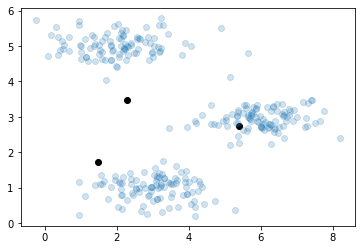

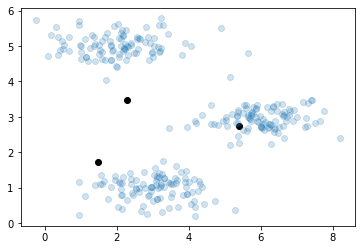

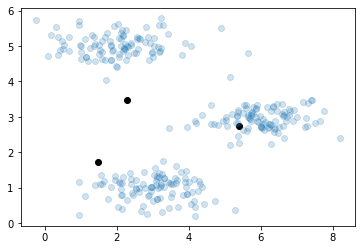

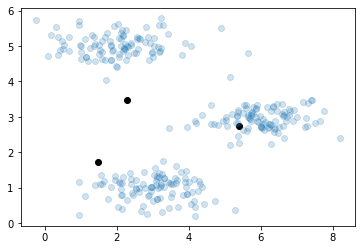

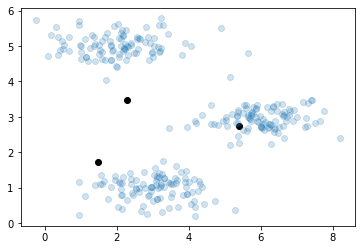

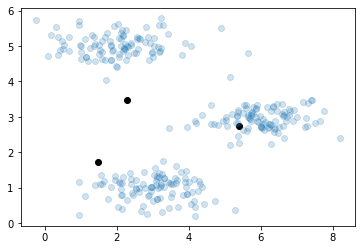

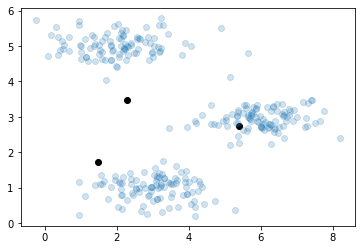

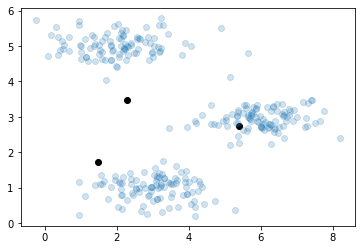

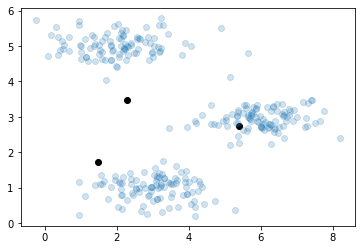

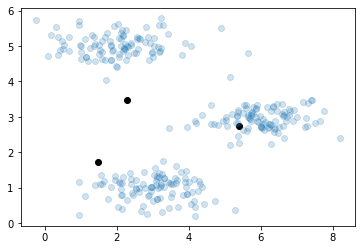

In [ ]:
#training process
for i in range(10):
  get_centroid=find_closest_centroid(centroids,X)
  new_centroids=centroid_update(get_centroid,X)
  #plot the figure
  plt.figure()
  plt.scatter(np.array(new_centroids)[:,0],np.array(new_centroids)[:,1],color="black")  #centroid
  plt.scatter(X[:,0],X[:,1],alpha=0.2)
  plt.show()